<a href="https://colab.research.google.com/github/carascott/EDA/blob/main/GSS_Analysis_Millie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the necessary packages:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the cleaned data file:

In [3]:
df = pd.read_csv('/cleanedSECOND.csv', low_memory=False)
print(df)

        age     sex   race                    degree     health         happy  \
0      48.0    male  white               high school       poor           NaN   
1      25.0    male  white                bachelor's        NaN  pretty happy   
2      42.0    male  white                bachelor's        NaN  pretty happy   
3      24.0    male  white               high school       good           NaN   
4      24.0  female  white                bachelor's  excellent    very happy   
...     ...     ...    ...                       ...        ...           ...   
24125  22.0  female  white               high school       good  pretty happy   
24126  29.0  female  white                  graduate       good  pretty happy   
24127  32.0    male  white  associate/junior college       good  pretty happy   
24128  49.0  female  white                  graduate       good    very happy   
24129  50.0    male  white                  graduate       fair  pretty happy   

             marital       

### Isolating out the variables we want to analyze, and checking the potential responses for each of them:

HERE ARE THE DATA CLEANING EXPLANATIONS:
- Age : no cleaning
- Sex : only keep answers "male" and "female"
- Degree: only keep answers that specifiy type of degree
- Health : only keep 4 measures of health
- Happy: only keep 3 measures of happiness
- Marial : only keep 4 variables, "never married" is no longer included as a seperate answer
- Martype: keeps only 2 measures of marital type
- Agewed : no cleaning
- Indus10 : industry type coded to the numerical ranges using the U.S. Bureau of the Census occupation (2010) and industry codes (2010)
- Childs : only keep integers
- Class : only keep 4 measures of class
- Agekdbrn : no cleaning
- Income16 : average taken of provided ranges to give numerical values of one's
income

In [4]:
# We can first list all of the possible responses given for 'sex':
sex_responses = []
for response in df['sex']:
    if response not in sex_responses:
        sex_responses.append(response)
print(sex_responses)

['male', 'female', nan]


In [5]:
# We can repeat this for marital status:
marriage_responses = []
for response in df['marital']:
    if response not in marriage_responses:
        marriage_responses.append(response)
print(marriage_responses)

['married', 'never married', 'divorced', 'not married', 'widowed']


In [6]:
# As well as education and income:
education_responses = []
for response in df['degree']:
    if response not in education_responses:
        education_responses.append(response)
print(education_responses)

income_responses = []
for response in df['income16']:
    if response not in income_responses:
        income_responses.append(response)
print(income_responses)

['high school', "bachelor's", 'associate/junior college', 'graduate', 'less than high school', nan]
['unemployed/zero income', '$170,000 or over', '$50,000 to $59,999', '$75,000 to $89,999', '$60,000 to $74,999', '$30,000 to $34,999', 'under $1,000', '$8,000 to $9,999', '$12,500 to $14,999', '$40,000 to $49,999', '$5,000 to $5,999', '$35,000 to $39,999', '$25,000 to $29,999', '$90,000 to $109,999', '$22,500 to $24,999', '$20,000 to $22,499', '$110,000 to $129,999', '$150,000 to $169,999', '$130,000 to $149,999', '$1,000 to $2,999', '$17,500 to $19,999', '$6,000 to $6,999', '$10,000 to $12,499', '$15,000 to $17,499', '$7,000 to $7,999', '$3,000 to $3,999', '$4,000 to $4,999']


This information can also be found in the codebook, but it is important to check that the data post-cleaning is what we expect.

Below, the marital column is edited to only include a not married answer:

In [7]:
df['marital'] = df['marital'].str.strip().replace('never married', 'not married')

### Replacing the non-numerical values for income with numerical values:

In [8]:
# Replacing the string based income values with numbers to make plotting and analysis easier:
# (For each income range given, we are converting it to its mean value)
# This has potential issues; for example, the "$170,000 or over" bucket is being lumped into an income
# of $170,000; this will make mean values of the income quantitatively inaccurate, but comparisons for the
# sake of the gender pay gap should still hold.

df = df.replace('unemployed/zero income', 0)
df = df.replace('$170,000 or over', 170000)
df = df.replace('$50,000 to $59,999', 55000)
df = df.replace('$75,000 to $89,999', 82500)
df = df.replace('$60,000 to $74,999', 67500)
df = df.replace('$30,000 to $34,999', 32500)
df = df.replace('under $1,000', 500)
df = df.replace('$8,000 to $9,999', 9000)
df = df.replace('$12,500 to $14,999', 13750)
df = df.replace('$40,000 to $49,999', 45000)
df = df.replace('$5,000 to $5,999', 5500)
df = df.replace('$35,000 to $39,999', 37500)
df = df.replace('$25,000 to $29,999', 27500)
df = df.replace('$90,000 to $109,999', 100000)
df = df.replace('$22,500 to $24,999', 23750)
df = df.replace('$20,000 to $22,499', 21250)
df = df.replace('$110,000 to $129,999', 120000)
df = df.replace('$150,000 to $169,999', 160000)
df = df.replace('$130,000 to $149,999', 140000)
df = df.replace('$1,000 to $2,999', 2000)
df = df.replace('$17,500 to $19,999', 18750)
df = df.replace('$6,000 to $6,999', 6500)
df = df.replace('$10,000 to $12,499', 11250)
df = df.replace('$15,000 to $17,499', 16250)
df = df.replace('$7,000 to $7,999', 7500)
df = df.replace('$3,000 to $3,999', 3500)
df = df.replace('$4,000 to $4,999', 4500)

### Making a plot and some preliminary analysis:

<Axes: xlabel='income16', ylabel='Density'>

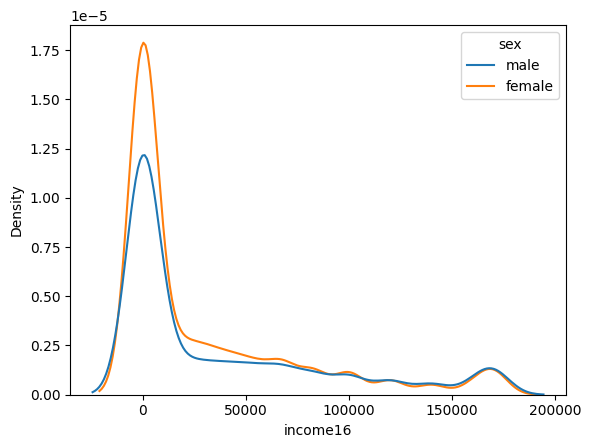

In [9]:
# First, we can see if the gender wage gap is immediately visible in a histogram:
sns.kdeplot(data=df,x='income16',hue='sex')

It does appear that in the lower income percentile, the proportion of females is greater; we can also quantify this by looking at some statistics regarding this data:

In [10]:
df.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female  13234.0  30262.959045  46898.119324  0.0  0.0  0.0  45000.0  170000.0
male    10784.0  36264.396328  52152.345673  0.0  0.0  0.0  67500.0  170000.0

We see that the mean income for males is higher, by about 19.8%, which will serve as our baseline estimate of the gender pay gap that we compare to with further analysis.

### The impact of age on the gender wage gap:

To begin, we can see if any visual trends appear when creating a scatterplot of income levels and age, with hue determined by sex:

<Axes: xlabel='income16', ylabel='age'>

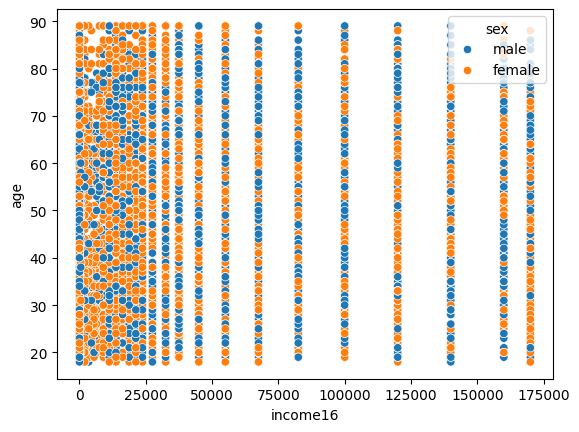

In [11]:
sns.scatterplot(data=df,x='income16',y='age',hue='sex')

This is not particularly illuminating, so we can first try separating age into four broad groups: "young" (below 35 years old), "middle-aged" (between 35 and 50 years old), "older" (between 50 and 70 years old), and "very old" (above 70 years old). Then, we can separate our earlier kernel density plot into four separate sets of statistics regarding the differences in income for the genders (this can also be done with a more finely-grained set of age groups):

In [13]:
df_young = df.loc[(df['age'] < 35)] # This is the dataframe we'll use for the "young" age category
# If the age doesn't fit with our "young" definition, we delete that row from this new dataframe.

<Axes: xlabel='income16', ylabel='Density'>

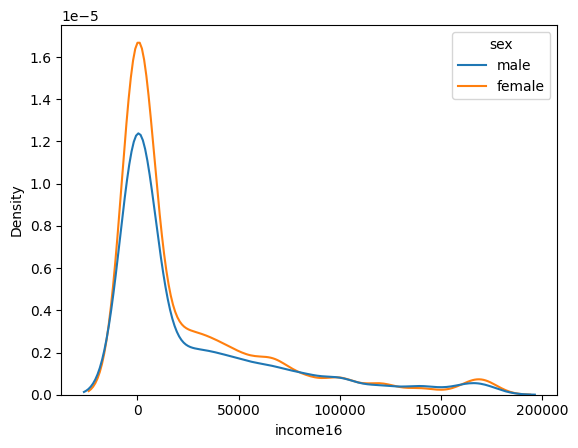

In [14]:
sns.kdeplot(data=df_young,x='income16',hue='sex')

In [15]:
df_young.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female   3299.0  24419.217945  40653.268153  0.0  0.0  0.0  37500.0  170000.0
male     2686.0  26610.387193  42799.717712  0.0  0.0  0.0  45000.0  170000.0

Here, we see that the income for males is only about 9.0% higher, lower than our baseline of 19.8% overall from earlier. We can hypothesize here that the gender wage gap is higher amongst older adults, and may have decreased over time due to increased efforts to educate the public and/or address the issue. We can test this with further analysis.

In [16]:
df_middleaged = df.loc[(df['age'] >= 35) & (df['age'] < 50)]
df_middleaged.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female   3440.0  32833.575581  50274.722441  0.0  0.0  0.0  55000.0  170000.0
male     2756.0  39377.721335  55509.772662  0.0  0.0  0.0  67500.0  170000.0

In this category, we see that the income for males is about 19.9% higher than that for females, about equal to our baseline of 19.8% that we found earlier.

In [17]:
df_older = df.loc[(df['age'] >= 50) & (df['age'] < 70)]
df_older.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female   4232.0  35056.001890  50519.327283  0.0  0.0  0.0  55000.0  170000.0
male     3661.0  39249.385414  55492.928489  0.0  0.0  0.0  67500.0  170000.0

Here, we see that the income for males is about 12.0% higher than that of females, lower than our baseline of 19.8% earlier. This is contrary to our hypothesis that the gender wage gap is higher at higher ages, but we will visually see the data more clearly in a bar graph later below. Before this, we can examine our "very old" group:

In [18]:
df_veryold = df.loc[(df['age'] >= 70)]
df_veryold.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                          \
          count          mean           std  min  25%      50%      75%   
sex                                                                       
female   1973.0  23976.178409  39333.639650  0.0  0.0      0.0  32500.0   
male     1472.0  38345.108696  49238.667079  0.0  0.0  15000.0  67500.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

Here we find a much higher wage gap of about 60.0%, in line with our original hypothesis that the gender wage gap rises with age; however, there are other factors to consider here: for example, people aged higher than 70 may well have grown up in a time when there were fewer opportunities for women to enter the workforce for similar pay to men, and this may be a cause of the drastically high wage gap in this case.

We can also visually see the differences in gender pay gap based on age if we show a bar graph of the incomes of males and females at several different groups of ages:

<Axes: xlabel='agegroup', ylabel='income16'>

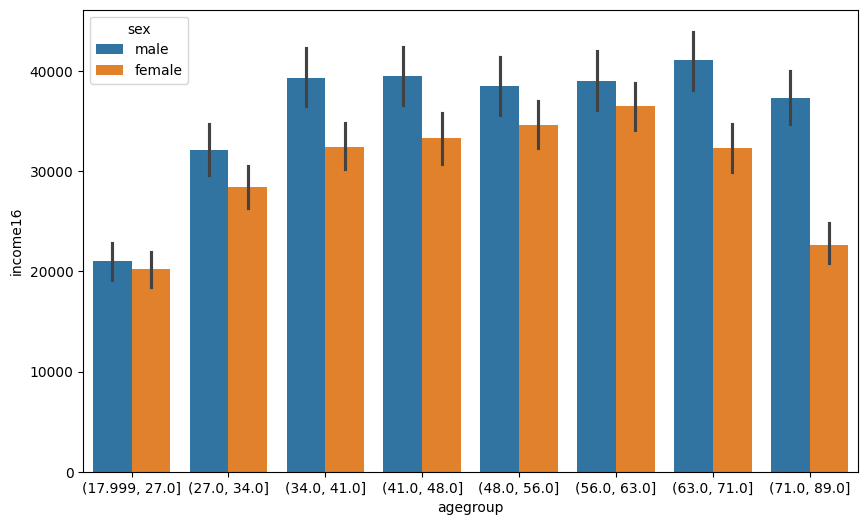

In [19]:
df['agegroup'] = pd.qcut(df['age'],8)
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=df,x='agegroup',y='income16',hue='sex',ax=ax)

Here, we see that the gender wage gap does broadly rise with age, though it decreases for a few of the age groups between 45 and 65, in line with what we observed from the statistics earlier.

### The impact of marital status on gender wage gap:

Here, since there are only a few different marital status groups, we can start by plotting a bar graph of income differences between males and females within groups of different marital statuses:

<Axes: xlabel='marital', ylabel='income16'>

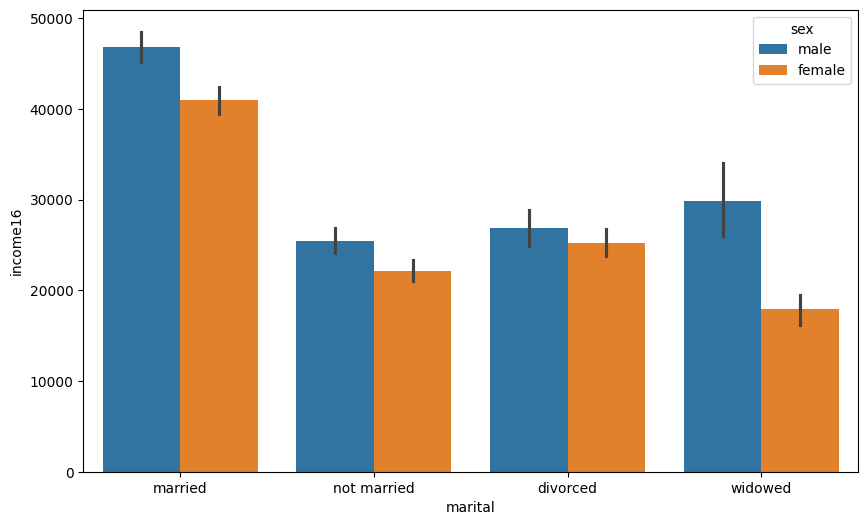

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=df,x='marital',y='income16',hue='sex',ax=ax)

Here, we see that the gender pay gap seems to be lower for never married, divorced, and unmarried individuals, whereas higher for married or widowed individuals. We can also examine numerical statistics for each of these groups, comparing the wage gap percentage to our overall baseline of 19.8% that we found earlier:

In [ ]:
df_married = df.loc[(df['marital'] == 'married')]
df_married.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female   5651.0  40950.893647  56159.601497  0.0  0.0  0.0  82500.0  170000.0
male     5237.0  46850.105022  59758.619428  0.0  0.0  0.0  82500.0  170000.0

In [ ]:
print("MARRIED\n")
print("Percent difference: " + str(round((46850.105022 - 40950.893647)/40950.893647*100,1)) + "%")
print("Baseline: 19.8%")

MARRIED

Percent difference: 14.4%
Baseline: 19.8%


In [ ]:
df_nevermarried = df.loc[(df['marital'] == 'never married')]
df_nevermarried.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female   3294.0  22706.739526  37611.270127  0.0  0.0  0.0  32500.0  170000.0
male     3119.0  25757.855082  40673.803621  0.0  0.0  0.0  37500.0  170000.0

In [ ]:
print("NEVER MARRIED\n")
print("Percent difference: " + str(round((25757.855082 - 22706.739526)/22706.739526*100,1)) + "%")
print("Baseline: 19.8%")

NEVER MARRIED

Percent difference: 13.4%
Baseline: 19.8%


In [ ]:
df_divorced = df.loc[(df['marital'] == 'divorced')]
df_divorced.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                         \
          count          mean           std  min  25%     50%      75%   
sex                                                                      
female   2341.0  25269.863306  37972.587399  0.0  0.0  2000.0  37500.0   
male     1635.0  26888.990826  41973.515407  0.0  0.0     0.0  45000.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [ ]:
print("DIVORCED\n")
print("Percent difference: " + str(round((26888.990826 - 25269.863306)/25269.863306*100,1)) + "%")
print("Baseline: 19.8%")

DIVORCED

Percent difference: 6.4%
Baseline: 19.8%


In [ ]:
df_notmarried = df.loc[(df['marital'] == 'not married')]
df_notmarried.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female    481.0  18432.952183  32379.388384  0.0  0.0  0.0  23750.0  170000.0
male      308.0  22516.233766  39317.535886  0.0  0.0  0.0  32500.0  170000.0

In [ ]:
print("NOT MARRIED\n")
print("Percent difference: " + str(round((22516.233766 - 18432.952183)/18432.952183*100,1)) + "%")
print("Baseline: 19.8%")

NOT MARRIED

Percent difference: 22.2%
Baseline: 19.8%


In [ ]:
df_widowed = df.loc[(df['marital'] == 'widowed')]
df_widowed.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                        \
          count          mean           std  min  25%    50%      75%   
sex                                                                     
female   1467.0  17905.589639  32690.145039  0.0  0.0    0.0  23750.0   
male      485.0  29863.917526  44664.359360  0.0  0.0  500.0  45000.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [ ]:
print("WIDOWED\n")
print("Percent difference: " + str(round((29863.917526 - 17905.589639)/17905.589639*100,1)) + "%")
print("Baseline: 19.8%")

WIDOWED

Percent difference: 66.8%
Baseline: 19.8%


Overall, we see that the gender wage gap is slightly lower for individuals that are unmarried, except in the case of widowed individuals, in which there is a dramatic wage gap. It is noteworthy, though, that the sample size of widowed men is significantly lower than that of widowed women; we know women tend to live longer than men, so this is to be expected, but this does also hint that there may be other extenuating factors that make this group have a particularly large wage gap, including the argument posed for the "very old" group from the previous section.

### The impact of education on gender wage gap:

Like in the previous section, since there are relatively few groups of education levels, we can begin with a bar graph to look for any visually apparent trends:

<Axes: xlabel='degree', ylabel='income16'>

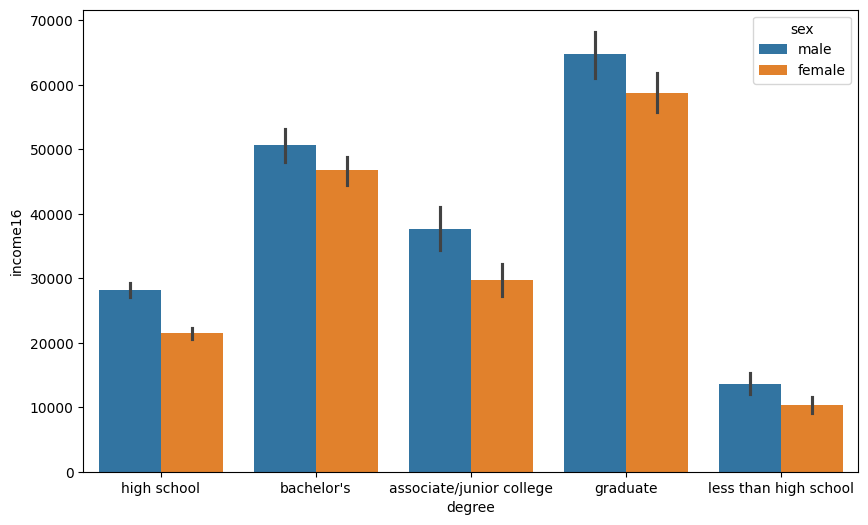

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=df,x='degree',y='income16',hue='sex',ax=ax)

From this, it appears that the gender wage gap may be lower for individuals with higher levels of education. As in the previous section, we can examine the statistics for each of these groups as well, comparing wage gap percentages to our baseline level:

In [ ]:
df_highschool = df.loc[(df['degree'] == 'high school')]
df_highschool.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female   6339.0  21460.088342  36090.050439  0.0  0.0  0.0  32500.0  170000.0
male     5234.0  28240.399312  42935.115310  0.0  0.0  0.0  45000.0  170000.0

In [ ]:
print("HIGH SCHOOL\n")
print("Percent difference: " + str(round((28240.399312 - 21460.088342)/21460.088342*100,1)) + "%")
print("Baseline: 19.8%")

HIGH SCHOOL

Percent difference: 31.6%
Baseline: 19.8%


In [ ]:
df_bachelors = df.loc[(df['degree'] == "bachelor's")]
df_bachelors.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                           \
          count          mean           std  min  25%      50%       75%   
sex                                                                        
female   2568.0  46760.514019  56882.116450  0.0  0.0  18750.0   82500.0   
male     2172.0  50684.967772  60426.956171  0.0  0.0  21250.0  100000.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [ ]:
print("BACHELOR'S\n")
print("Percent difference: " + str(round((50684.967772 - 46760.514019)/46760.514019*100,1)) + "%")
print("Baseline: 19.8%")

BACHELOR'S

Percent difference: 8.4%
Baseline: 19.8%


In [ ]:
df_associates = df.loc[(df['degree'] == "associate/junior college")]
df_associates.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                          \
          count          mean           std  min  25%      50%      75%   
sex                                                                       
female   1196.0  29672.031773  42795.142228  0.0  0.0      0.0  45000.0   
male      782.0  37651.534527  49644.019825  0.0  0.0  11250.0  67500.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [ ]:
print("ASSOCIATE/JUNIOR COLLEGE\n")
print("Percent difference: " + str(round((37651.534527 - 29672.031773)/29672.031773*100,1)) + "%")
print("Baseline: 19.8%")

ASSOCIATE/JUNIOR COLLEGE

Percent difference: 26.9%
Baseline: 19.8%


In [ ]:
df_graduate = df.loc[(df['degree'] == "graduate")]
df_graduate.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                           \
          count          mean           std  min  25%      50%       75%   
sex                                                                        
female   1577.0  58750.792644  63594.703285  0.0  0.0  37500.0  100000.0   
male     1333.0  64845.086272  68307.440630  0.0  0.0  45000.0  120000.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [ ]:
print("GRADUATE\n")
print("Percent difference: " + str(round((64845.086272 - 58750.792644)/58750.792644*100,1)) + "%")
print("Baseline: 19.8%")

GRADUATE

Percent difference: 10.4%
Baseline: 19.8%


In [ ]:
df_less = df.loc[(df['degree'] == "less than high school")]
df_less.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female   1537.0  10357.514639  23989.105067  0.0  0.0  0.0  11250.0  170000.0
male     1252.0  13651.158147  29228.296734  0.0  0.0  0.0  11250.0  170000.0

In [ ]:
print("LESS THAN HIGH SCHOOL\n")
print("Percent difference: " + str(round((13651.158147 - 10357.514639)/10357.514639*100,1)) + "%")
print("Baseline: 19.8%")

LESS THAN HIGH SCHOOL

Percent difference: 31.8%
Baseline: 19.8%


Overall, we do see that the gender wage gap is highest for those with the lowest levels of education, and tends to decrease with increasing education.